In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

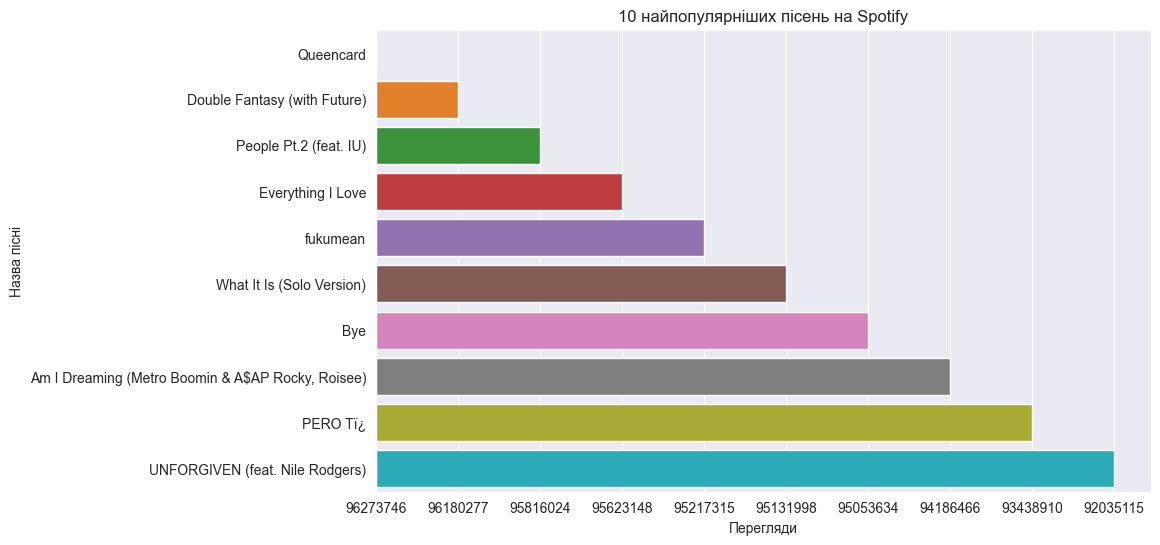

In [2]:
# Імпортування файлу
df = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")

# Відсортування 10 найпопулярніших пісень
songs_2023 = df[df["released_year"] == 2023]
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
top_streams = songs_2023.sort_values(by='streams', ascending=False).head(10)
top1_streams = top_streams

# Побудова горизонтальної діаграми
plt.figure(figsize=(10, 6))
sns.barplot(x=top_streams['streams'], y=top_streams['track_name'], orient="h", palette='tab10', hue=top_streams['streams'], legend=False)
plt.xlabel('Перегляди')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify')

plt.show()


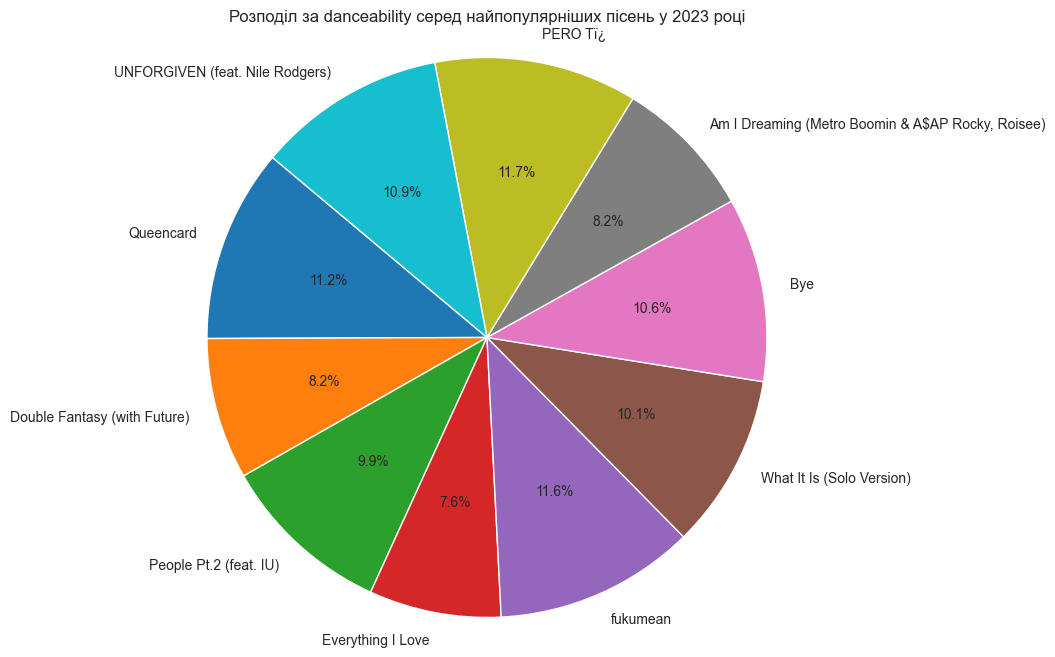

In [3]:
# Побудова діаграми
plt.figure (figsize=(10, 8))
plt.pie(top_streams['danceability_%'], labels=top_streams['track_name'], autopct='%1.1f%%', startangle=140) 
plt.axis('equal')
plt.title("Розподіл за danceability серед найпопулярніших пісень у 2023 році")
plt.show()



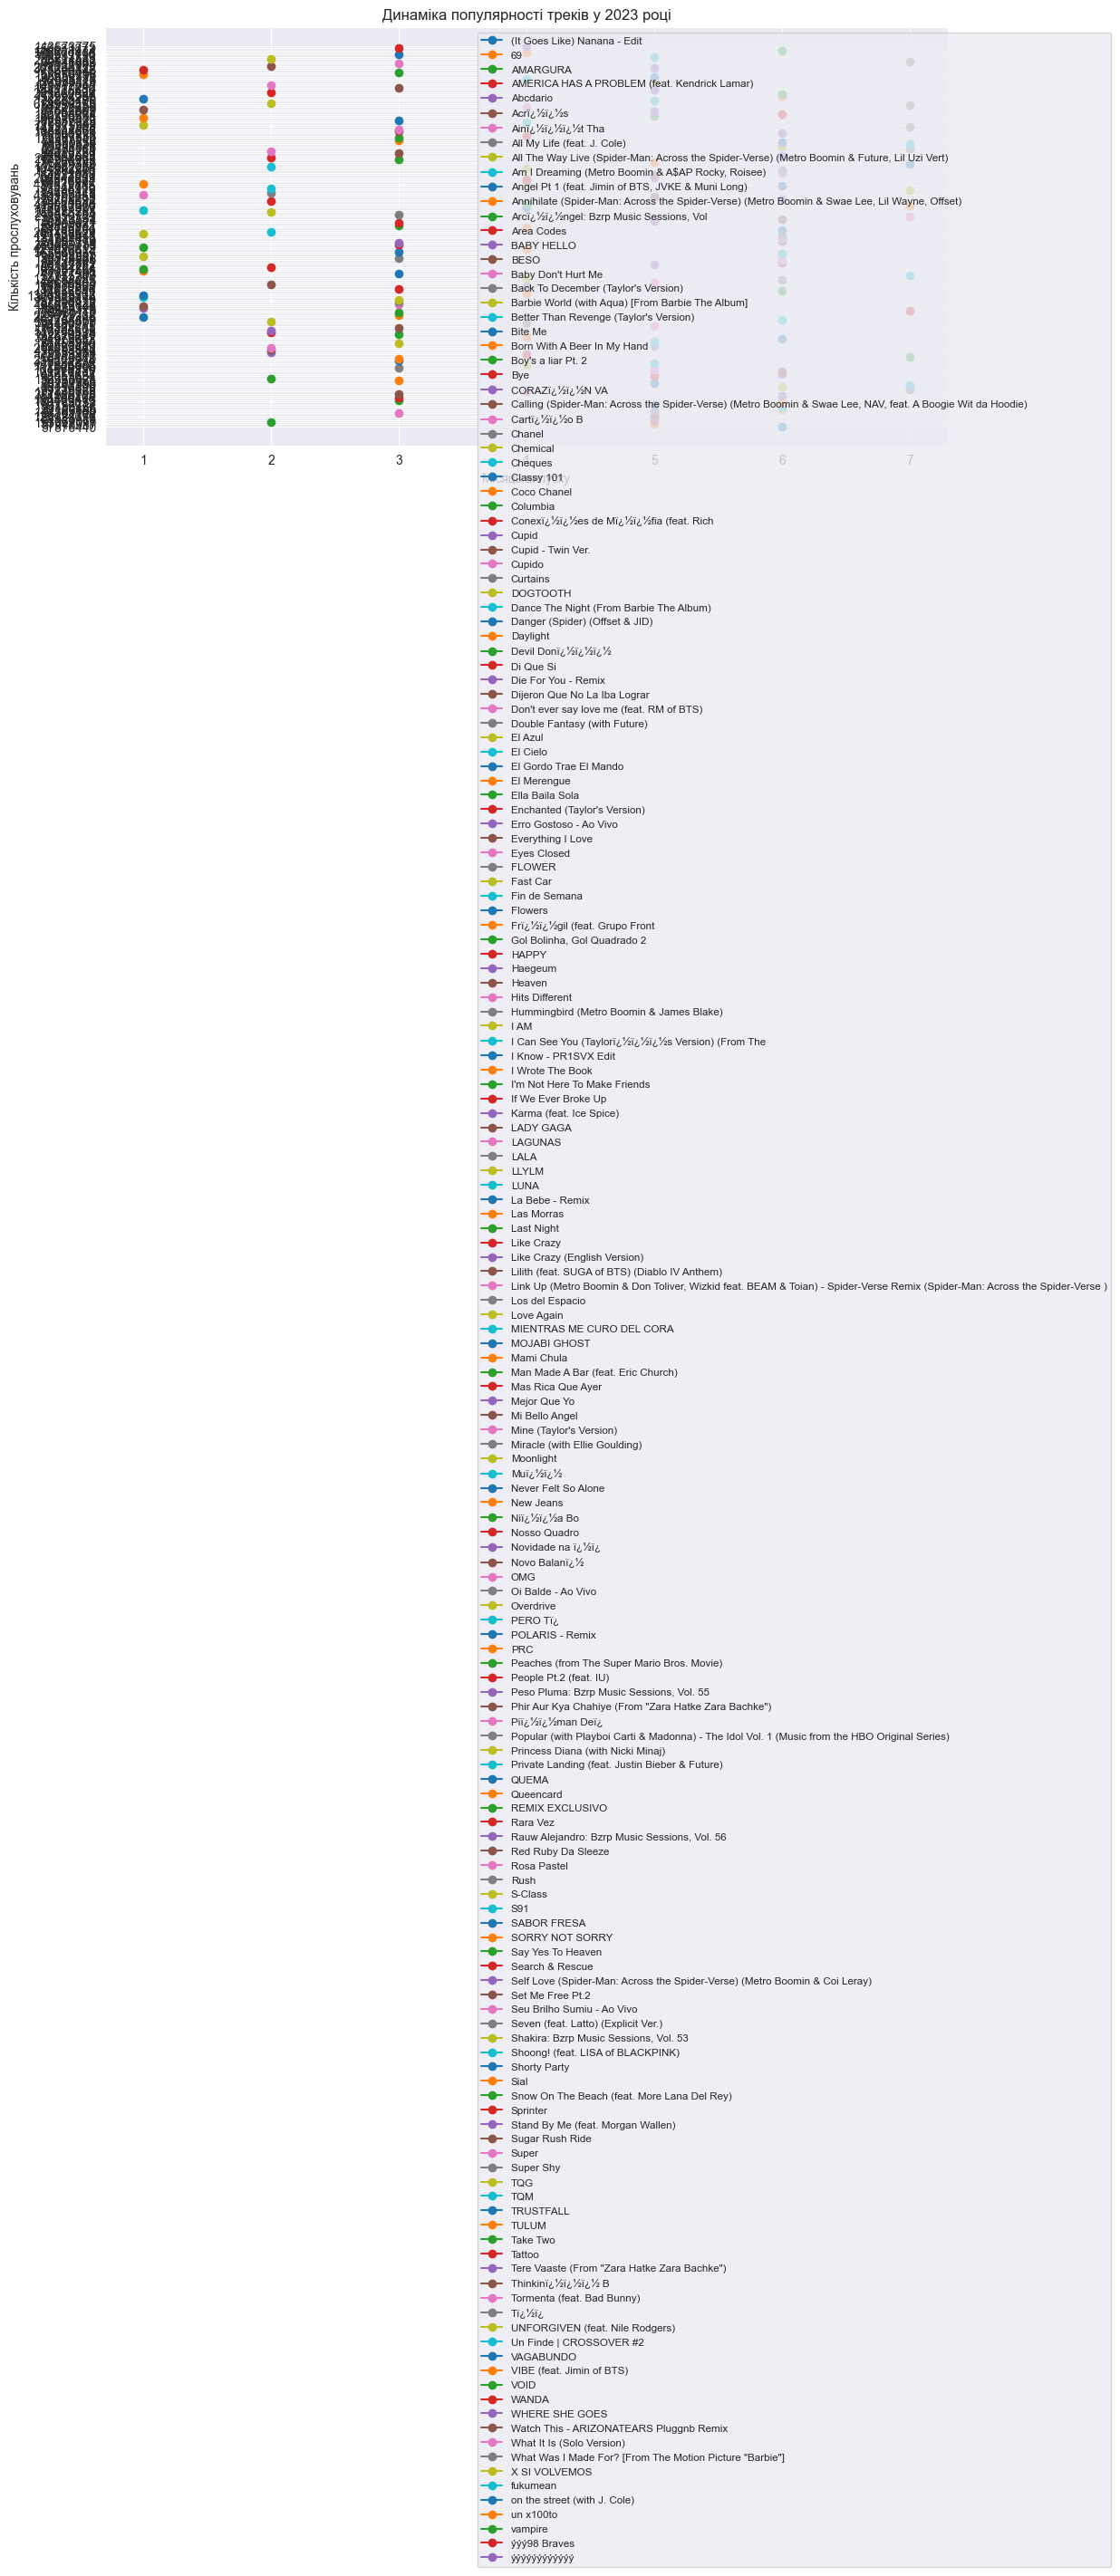

In [5]:
plt.figure(figsize=(12, 6))
songs_2023_selected = songs_2023[['track_name', 'streams', 'released_month']]

for track_name, track_data in songs_2023_selected.groupby('track_name'):
    plt.plot(
        track_data['released_month'],
        track_data['streams'],
        marker='o',  # Заменил '0' на 'o' для отображения точек на графике
        linestyle='-',
        label=track_name
    )

plt.xlabel("Місяць випуску")
plt.ylabel("Кількість прослуховувань")
plt.title("Динаміка популярності треків у 2023 році")
plt.xticks(songs_2023_selected['released_month'].unique())
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='small')
plt.grid(True)
plt.show()

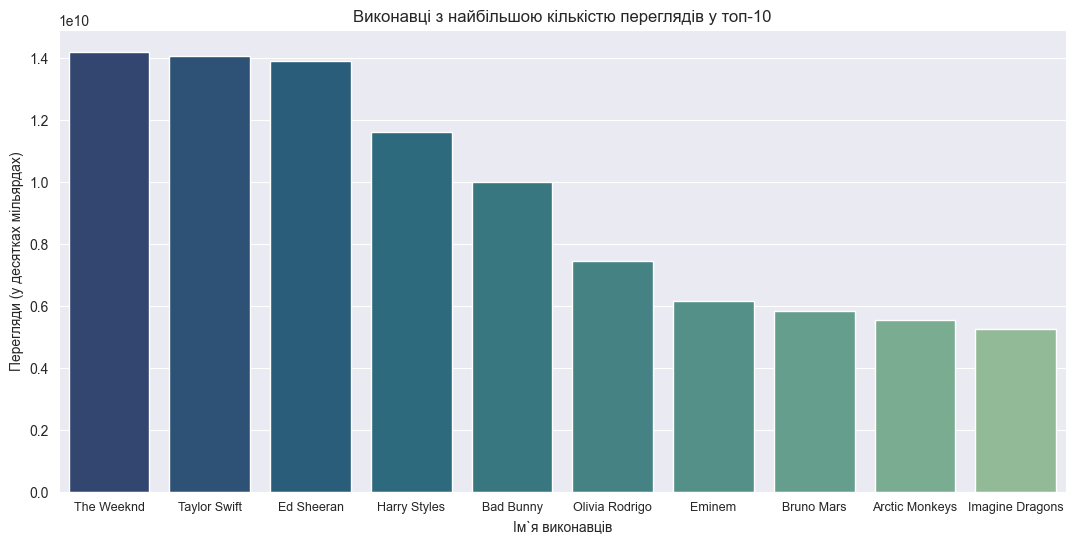

In [6]:
streams_by_artist = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(13, 6))
sns.barplot(x=streams_by_artist.index, y=streams_by_artist.values, palette='crest_r', hue=top_streams['track_name'], legend=False)
plt.ylabel('Перегляди (у десятках мільярдах)',fontsize=10)
plt.xlabel('Ім`я виконавців',fontsize=10)
plt.title('Виконавці з найбільшою кількістю переглядів у топ-10')
plt.xticks(fontsize=9)

plt.show()

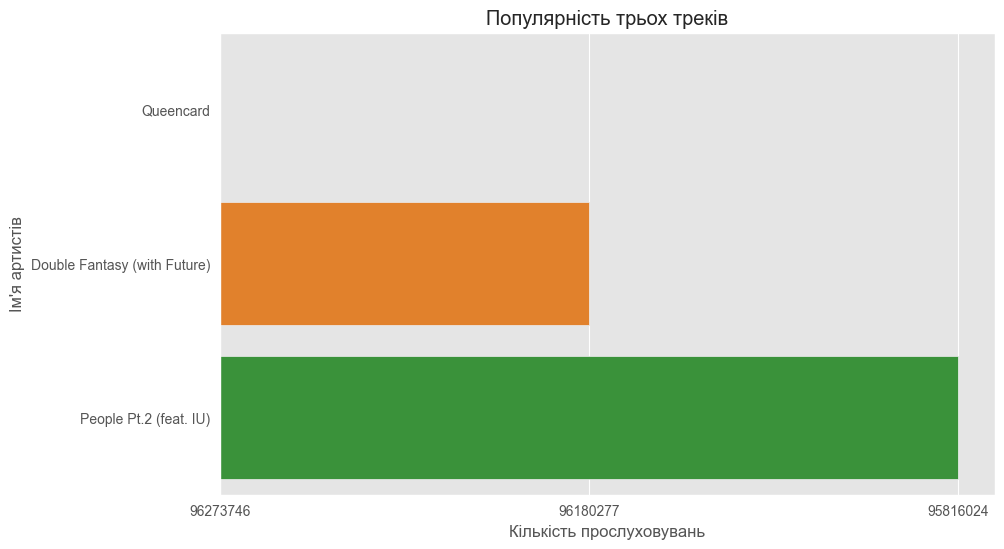

In [14]:
best_artist_2023 = songs_2023.groupby("track_name")["streams"].sum().sort_values(ascending = False).head(3)
plt.figure(figsize=(10, 6))
sns.barplot(x = best_artist_2023.values, y = best_artist_2023.index, orient="h", palette='tab10', hue=best_artist_2023, legend=False);
plt.xlabel ("Кількість прослуховувань")
plt.ylabel ("Ім'я артистів")
plt.title("Популярність трьох треків")
plt.show()